In [45]:
# def read_json_log(path):
    
#     import json
#     f=open(path,"r")
#     for line in f:
#         decodes=json.loads(line)
#     f.close()
#     return decodes

# def plot_logs(log, save_loss_dir, save_accu_dir, save_dpi = 1000, plot_dpi = 1000):
    
#     import matplotlib.pyplot as plt 
# #     import numpy as np
# #     from numpy import linespace
    
#     %matplotlib inline
    
#     plt.rcParams['savefig.dpi'] = save_dpi 
#     plt.rcParams['figure.dpi'] = plot_dpi 
#     #############################
# #     log:
# #         trn_metrics:
# #             train_loss:
# #                 [train_loss_per_epoch: [train_loss_per_log_step_in_batch]]
# #             train_accu:
# #                 [train_accu_per_epoch: [train_accu_per_log_step_in_batch]
# #         tst_metrics:
# #             test_accu:
# #                 [test_accu_per_epoch: [test_accu_per_log_step_in_batch]
# #         meta:
# #             log_step
# #             batch_size
    
#     #############################
    
#     for log in logs
#     log_step, batch_size = log['meta']['log_step'], log['meta']['log_step']
        
#     raw_trn_loss, raw_trn_accu, raw_tst_accu =\
#     [i for l in log['trn_metrics']['train_loss'] for i in l],\
#     [i for i in log['trn_metrics']['train_accu']],\
#     [i for i in log['tst_metrics']['test_accu']]
    
    
#     num_epoch = len(raw_trn_accu)
#     num_batch_log = len(raw_trn_loss)
# #     accu_x = np.linespace(start = 1, stop = 1+num_epoch, num = num_epoch)
# #     loss_x = np.linespace(start = 1, stop = 1+num_epoch, num = num_batch_log)
#     accu_x =[i for i in range(1, 1+num_epoch)]
#     loss_x =[i/num_batch_log*num_epoch + 1 for i in range(num_batch_log)]
    
#     plt.figure()
#     plt.subplot(2,1,1)
    
#     plt.plot(loss_x, raw_trn_loss, label="tarin loss")
    
#     plt.xlabel("epoch")
#     plt.ylabel("loss")
    
#     plt.savefig(save_loss_dir)
#     plt.show()
    
#     plt.subplot(2,1,2)
    
#     plt.plot(accu_x, raw_trn_accu, label="train accuracy")
#     plt.plot(accu_x, raw_tst_accu, label="test accuracy")
#     plt.legend()
    
#     plt.savefig(save_accu_dir)
#     plt.show()
    


# def plot_from_json(log_file_paths_list, save_loss_dir, save_accu_dir):
    
#     logs = {log_file_paths_list : read_json_log(log_file_path) for log_file_path in log_file_paths_list}
    
#     plot_logs(logs)

In [61]:
def read_json_log(path):
    
    import json
    f=open(path,"r")
    for line in f:
        decodes=json.loads(line)
    f.close()
    return decodes

def plot_logs(logs, save_tst_accu_dir, save_trn_accu_dir, save_dpi = 1000, plot_dpi = 1000):
    
    import matplotlib.pyplot as plt 
#     import numpy as np
#     from numpy import linespace
    
    %matplotlib inline
    
    plt.rcParams['savefig.dpi'] = save_dpi 
    plt.rcParams['figure.dpi'] = plot_dpi 
    #############################
#     log:
#         trn_metrics:
#             train_loss:
#                 [train_loss_per_epoch: [train_loss_per_log_step_in_batch]]
#             train_accu:
#                 [train_accu_per_epoch: [train_accu_per_log_step_in_batch]
#         tst_metrics:
#             test_accu:
#                 [test_accu_per_epoch: [test_accu_per_log_step_in_batch]
#         meta:
#             log_step
#             batch_size
    
    #############################
    plt.figure()
    
    #############################
    #plot test accuracy
    #############################
    plt.subplot(2,1,1)
    
    for log_name, log in logs.items():
        log_step = log['meta']['log_step']

        raw_tst_accu = [i for i in log['tst_metrics']['test_accu']]

        num_epoch = len(raw_tst_accu)
    #     accu_x = np.linespace(start = 1, stop = 1+num_epoch, num = num_epoch)
    #     loss_x = np.linespace(start = 1, stop = 1+num_epoch, num = num_batch_log)
        accu_x =[i for i in range(1, 1+num_epoch)]

        plt.plot(accu_x, raw_tst_accu, label=log_name)
        
    plt.legend()
    plt.title("test accuracy")
    plt.savefig(save_tst_accu_dir)
    plt.show()
        
    #############################
    #plot train accuracy
    #############################
    plt.subplot(2,1,2)
    
    for log_name, log in logs.items():
        log_step = log['meta']['log_step']

        raw_trn_accu = [i for i in log['trn_metrics']['train_accu']]

        num_epoch = len(raw_tst_accu)
    #     accu_x = np.linespace(start = 1, stop = 1+num_epoch, num = num_epoch)
    #     loss_x = np.linespace(start = 1, stop = 1+num_epoch, num = num_batch_log)
        accu_x =[i for i in range(1, 1+num_epoch)]

        plt.plot(accu_x, raw_trn_accu, label=log_name)
        
    plt.legend()
    plt.title("train accuracy")
    plt.savefig(save_trn_accu_dir)
    plt.show()


def plot_from_json(log_file_paths_list, save_test_accu_dir, save_trn_accu_dir):
    
    logs = {log_file_path : read_json_log(log_file_path) for log_file_path in log_file_paths_list}
    
    plot_logs(logs, save_test_accu_dir, save_trn_accu_dir)

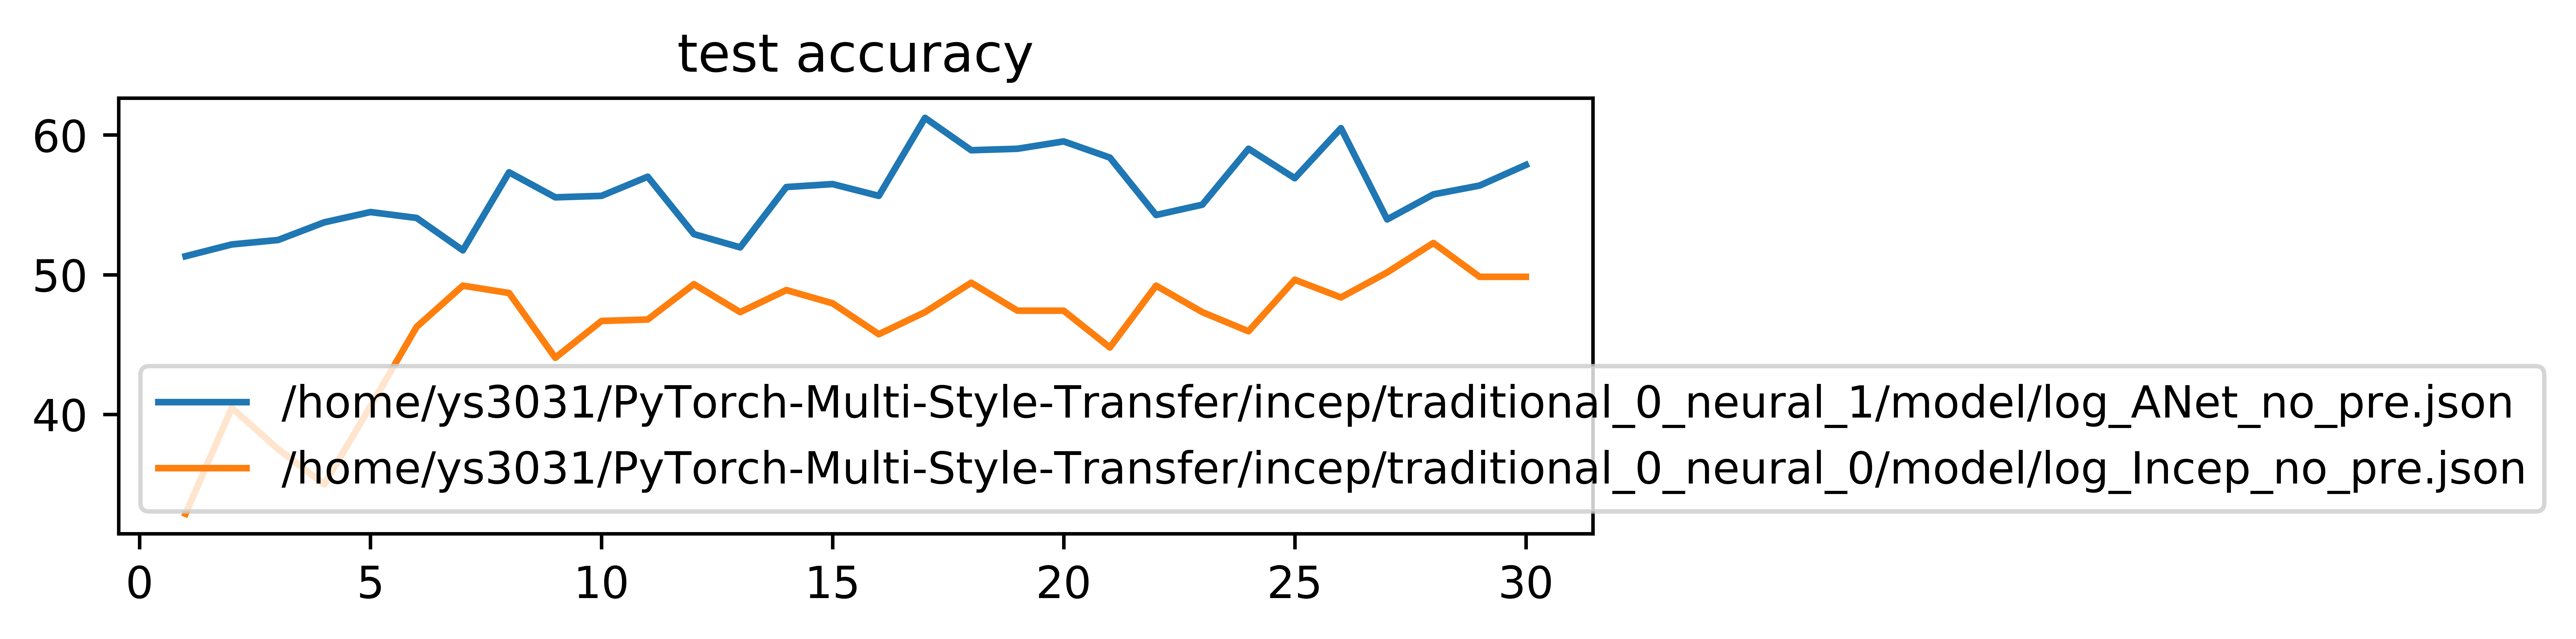

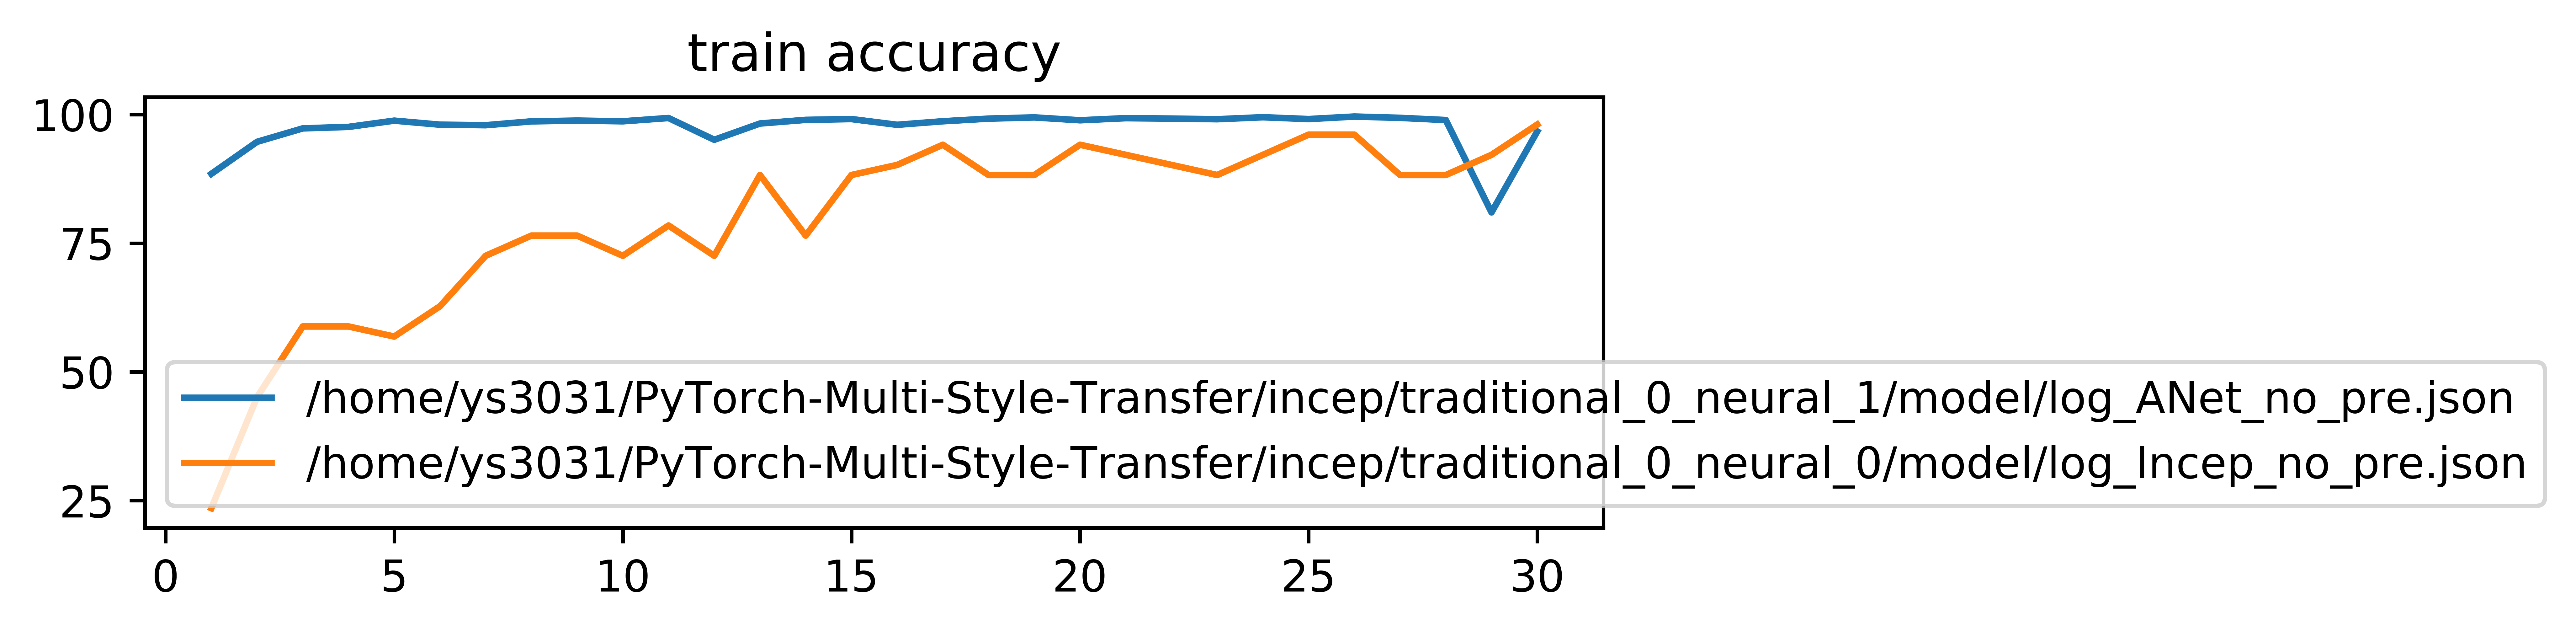

In [62]:
# log_file_path = "/home/bj2376/PyTorch-Multi-Style-Transfer/plot_figure/log_ANet_no_pre.json"
save_test_accu_dir, save_trn_accu_dir = "test_accu.png", "train_accu.png"
log_file_paths_list = \
["/home/ys3031/PyTorch-Multi-Style-Transfer/incep/traditional_0_neural_1/model/log_ANet_no_pre.json",\
"/home/ys3031/PyTorch-Multi-Style-Transfer/incep/traditional_0_neural_0/model/log_Incep_no_pre.json"]
plot_from_json(log_file_paths_list, save_test_accu_dir, save_trn_accu_dir)